In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('titanic-training-data.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Analyse the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

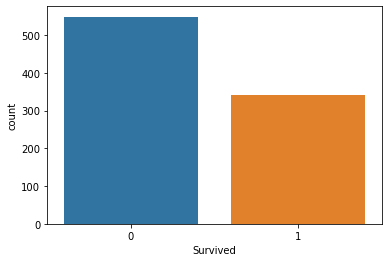

In [8]:
sns.countplot(x="Survived", data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

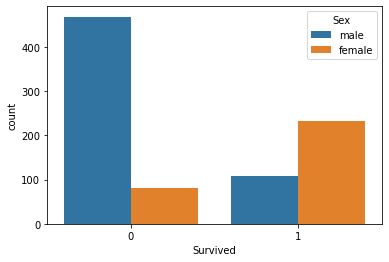

In [9]:
sns.countplot(x="Survived", hue="Sex", data=df)

In [10]:
pd.crosstab(df['Survived'],df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

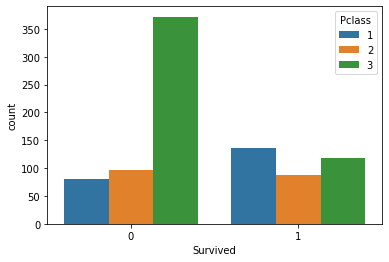

In [11]:
sns.countplot(x="Survived", hue="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

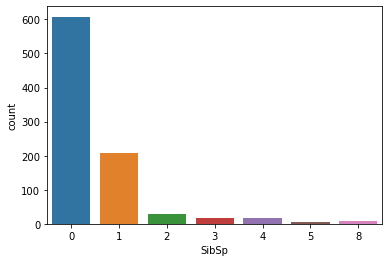

In [12]:
sns.countplot(x="SibSp", data=df)

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
meanAge = df['Age'].mean()
meanAge

29.69911764705882

In [15]:
medianAge = df['Age'].median()
medianAge

28.0

In [16]:
df['Age'].replace(np.nan, meanAge, inplace=True)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
modeEmb = df['Embarked'].mode().values[0]
modeEmb

'S'

In [19]:
df['Embarked'].replace(np.nan, modeEmb, inplace=True)

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
df.drop('Cabin',axis=1,inplace=True)

In [22]:
df.drop('Name',axis=1,inplace=True)

In [23]:
df.drop('Fare',axis=1,inplace=True)

In [24]:
df.drop('PassengerId',axis=1,inplace=True)

In [25]:
df.drop('Ticket',axis=1,inplace=True)

In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [27]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

### One-hot Encoding

In [28]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked', 'Pclass'])

In [29]:
df.head()

,Survived,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,0,1,1,0,0
4,0,35.0,0,0,0,1,0,0,1,0,0,1


In [30]:
df.dtypes

Survived        int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
Pclass_1        uint8
Pclass_2        uint8
Pclass_3        uint8
dtype: object

### Split the Data

In [31]:
X = df.drop('Survived', axis=1)
y=df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

### Fit the Model

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
model.score(X_train, y_train)

0.812199036918138

In [35]:
model.score(X_test, y_test)

0.7798507462686567

In [36]:
predictions = model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7798507462686567

In [38]:
from sklearn import metrics

<AxesSubplot:>

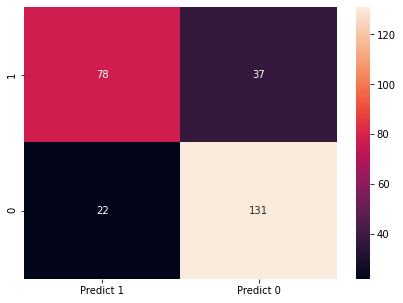

In [39]:
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ["1","0"]],
                    columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [40]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.78      0.68      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.9550561797752809
0.753731343283582


In [43]:
# model2_reg = DecisionTreeClassifier(max_depth=3,criterion='entropy')
# model2_reg = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model2_reg = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model2_reg.fit(X_train,y_train)
print(model2_reg.score(X_train,y_train))
print(model2_reg.score(X_test,y_test))

0.8154093097913323
0.7350746268656716


In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
# model_bag = BaggingClassifier()
# model_bag = BaggingClassifier(base_estimator=model2_reg)
# model_bag = BaggingClassifier(n_estimators=12)
model_bag = BaggingClassifier(n_estimators=33,base_estimator=model2_reg)

In [46]:
model_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=2),
                  n_estimators=33)

In [47]:
model_bag.score(X_train,y_train)

0.8154093097913323

In [48]:
model_bag.score(X_test,y_test)

0.746268656716418

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
# model_ada = AdaBoostClassifier()
model_ada = AdaBoostClassifier(n_estimators=30)

In [51]:
model_ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=30)

In [52]:
model_ada.score(X_train,y_train)

0.8378812199036918

In [53]:
model_ada.score(X_test,y_test)

0.7798507462686567

In [54]:
 from sklearn.ensemble import GradientBoostingClassifier

In [55]:
# model_grad = GradientBoostingClassifier()
model_grad = GradientBoostingClassifier(n_estimators=60)

In [56]:
model_grad.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=60)

In [57]:
model_grad.score(X_train,y_train)

0.8876404494382022

In [58]:
model_grad.score(X_test,y_test)

0.7649253731343284

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model_rand = RandomForestClassifier(n_estimators=65,max_features=10)

In [61]:
model_rand.fit(X_train,y_train)

RandomForestClassifier(max_features=10, n_estimators=65)

In [62]:
model_rand.score(X_train,y_train)

0.9550561797752809

In [63]:
model_rand.score(X_test,y_test)

0.7611940298507462

In [65]:
from sklearn.svm import SVC

In [74]:
# model = SVC()
# model = SVR(C=0.5,kernel='rbf',gamma='scale')
model = SVC( C=0.5, kernel='linear',gamma='scale')

In [75]:
model.fit(X_train,y_train)

SVC(C=0.5, kernel='linear')

In [76]:
model.score(X_train,y_train)

0.8009630818619583

In [77]:
model.score(X_test,y_test)

0.753731343283582

In [78]:
from sklearn.svm import SVR

In [91]:
# model = SVR()
# model = SVR(C=0.5,kernel='rbf',gamma='scale')
# model = SVR(C=0.5,kernel='linear',gamma='scale')
model = SVR(C=0.5,kernel='linear',gamma='auto')

In [92]:
model.fit(X_train,y_train)

SVR(C=0.5, gamma='auto', kernel='linear')

In [93]:
model.score(X_train,y_train)

0.26950754144880107

In [94]:
model.score(X_test,y_test)

0.15502533777214456

In [ ]:
# Do the same as above for hotel-booking dataset where dependent variable 
# is 'is_cancelled' and pima-indian-diabetes dataset where dependent variable is
# 'class'

In [ ]:
# for hotel-booking dataset and pima-indian-diabetes dataset use BaggingClassifier
# for auto_mpg dataset use BaggingRegressor

In [ ]:
# Refer to LogisticRegression-Practical.ipynb in Yhills_June_2 repository in Premalatha-success github account